<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Autocorrelation and time series decomposition practice



---

### Take the AAPL stock data

- Extract the closing prices 
- Decompose the time series 
- Investigate for (partial) autocorrelations

**Bonus:** Resample the data weekly or difference the time series and repeat the same steps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1])
    return fig, ax

Let's use recent AAPL data

In [4]:
df = pd.read_csv('../datasets/aapl_split_adjusted.csv')

In [5]:
df['Date'] = pd.to_datetime(df.Date)
df.sort_values(by='Date',inplace=True)
df.set_index('Date',inplace=True)

df.index.name = None
df.head()

,Open,High,Low,Close,Volume
2021-01-29,135.83,136.74,130.21,131.96,177523812
2021-02-01,133.75,135.38,130.93,134.14,106239797
2021-02-02,135.73,136.31,134.61,134.99,83305367
2021-02-03,135.76,135.77,133.61,133.94,89880945
2021-02-04,136.30,137.40,134.59,137.39,84183055


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 677 entries, 2021-01-29 to 2023-10-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    677 non-null    float64
 1   High    677 non-null    float64
 2   Low     677 non-null    float64
 3   Close   677 non-null    float64
 4   Volume  677 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 31.7 KB


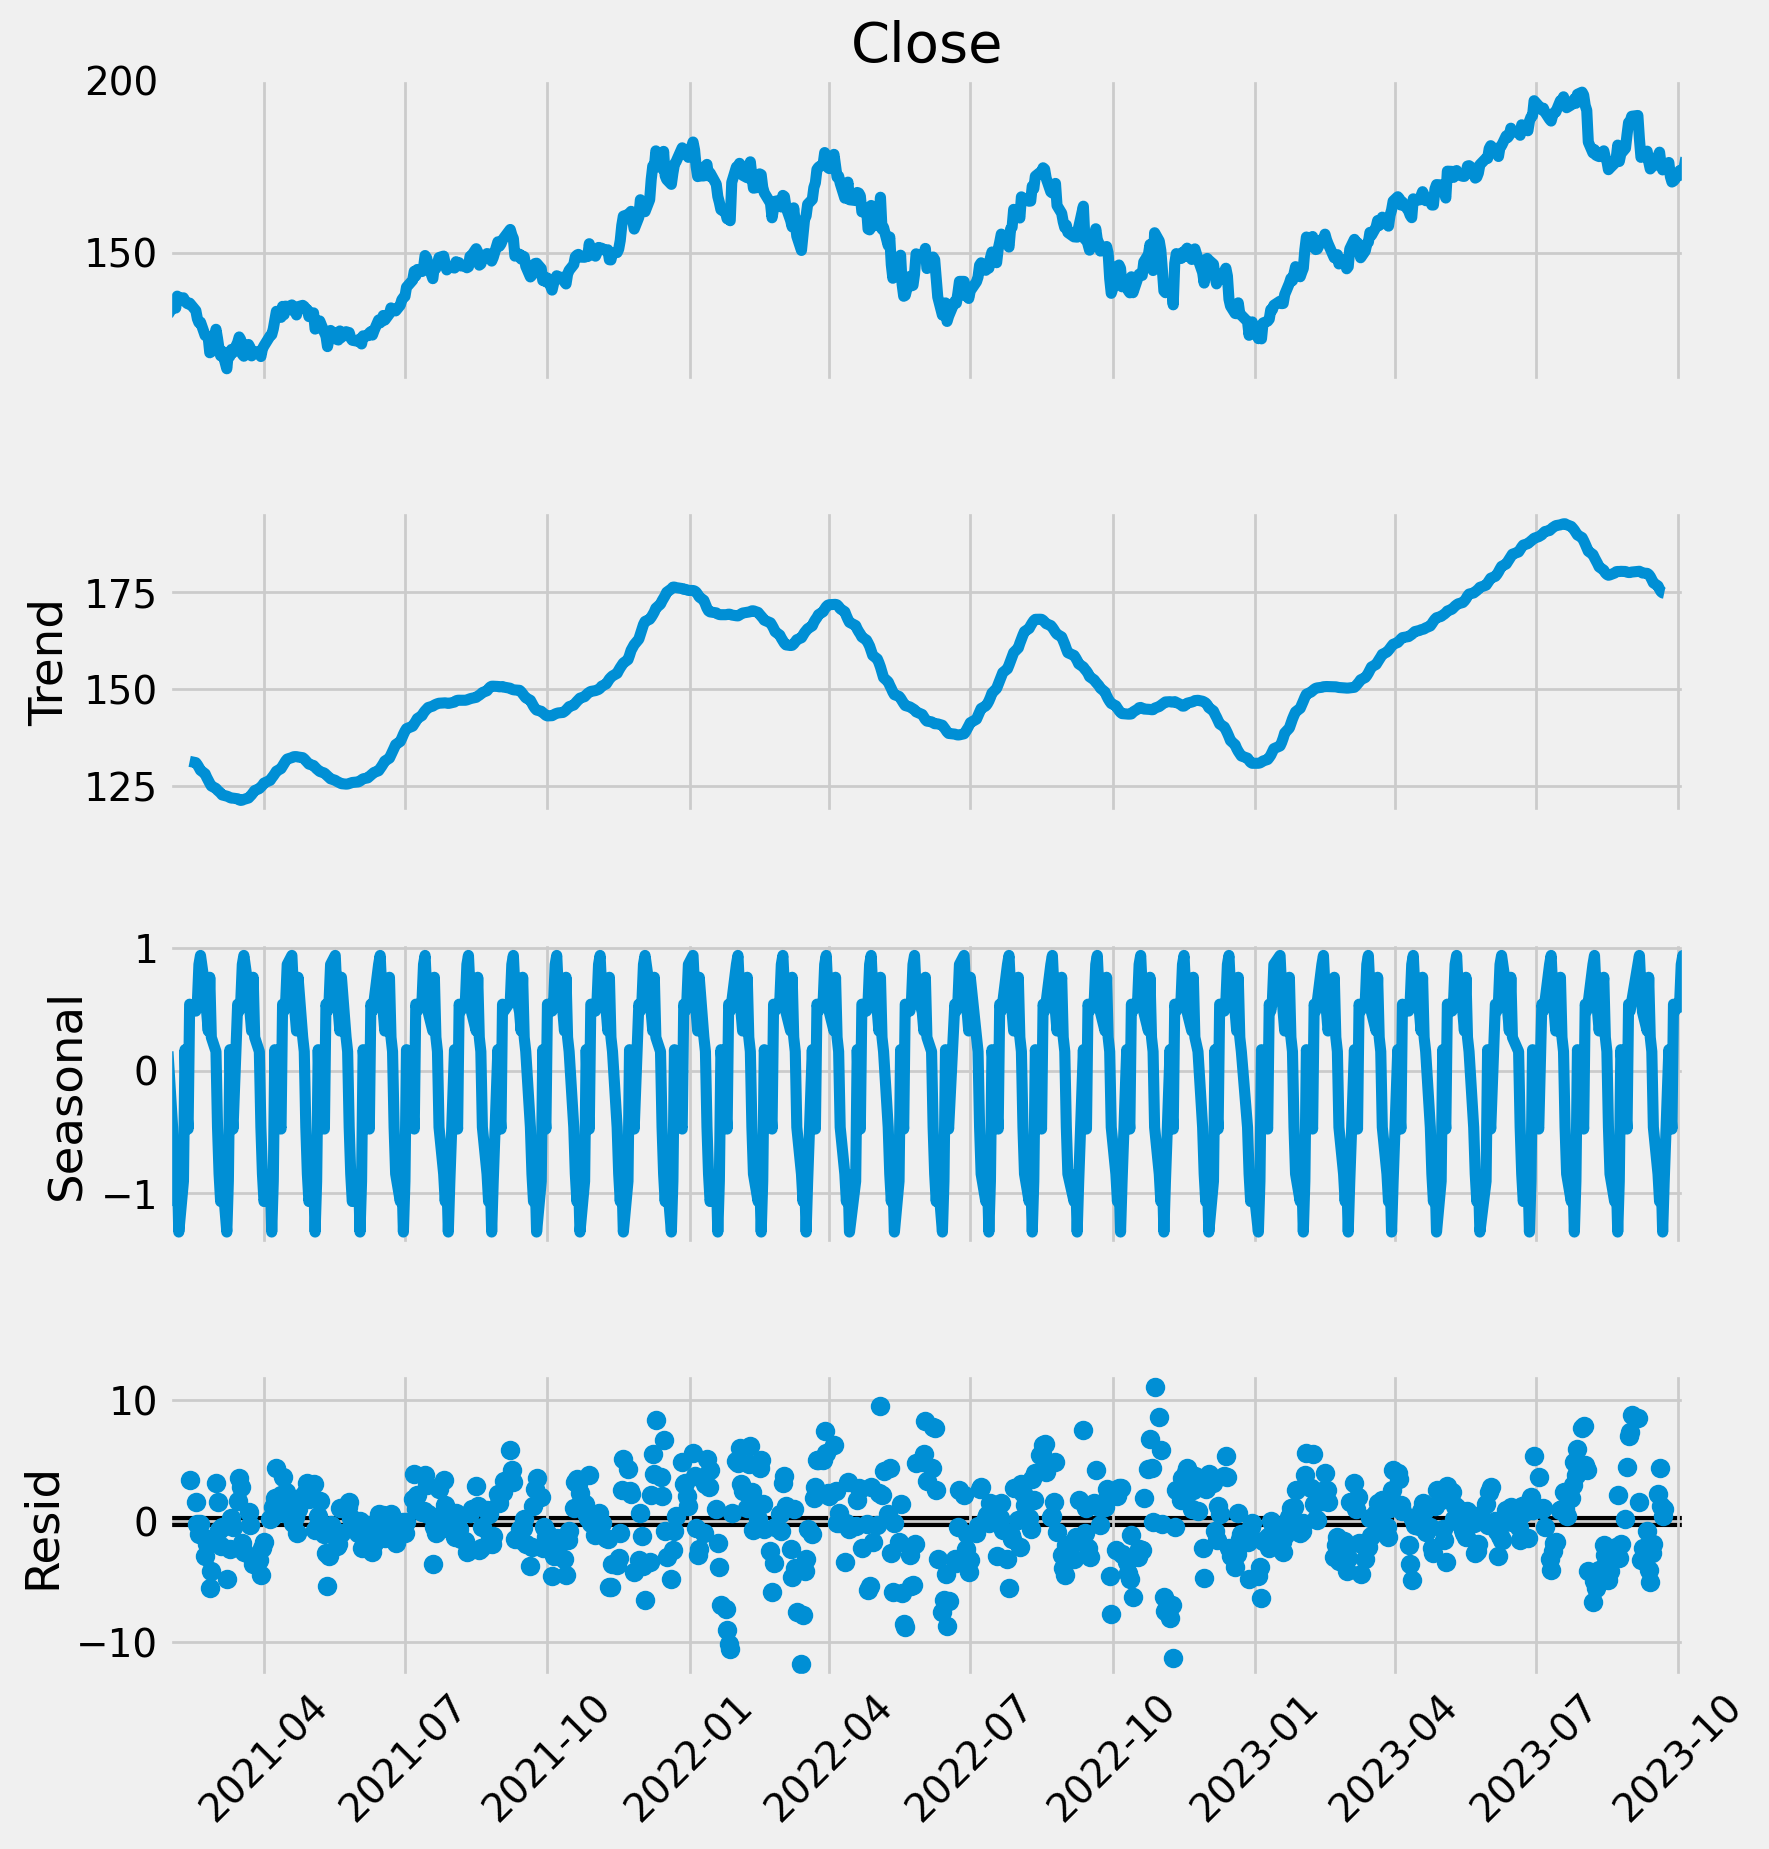

In [7]:
# Perform seasonal_decompose on the closing prices with a period=20 (20 observations, about one monthfig = seasonal_decompose(df.Close.resample('W').mean(), period=12).plot()

fig = seasonal_decompose(df.Close, period=20).plot()
fig.set_size_inches(10,10)
plt.xticks(rotation=45)
plt.show()


(<Figure size 1200x400 with 2 Axes>,
 array([<Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

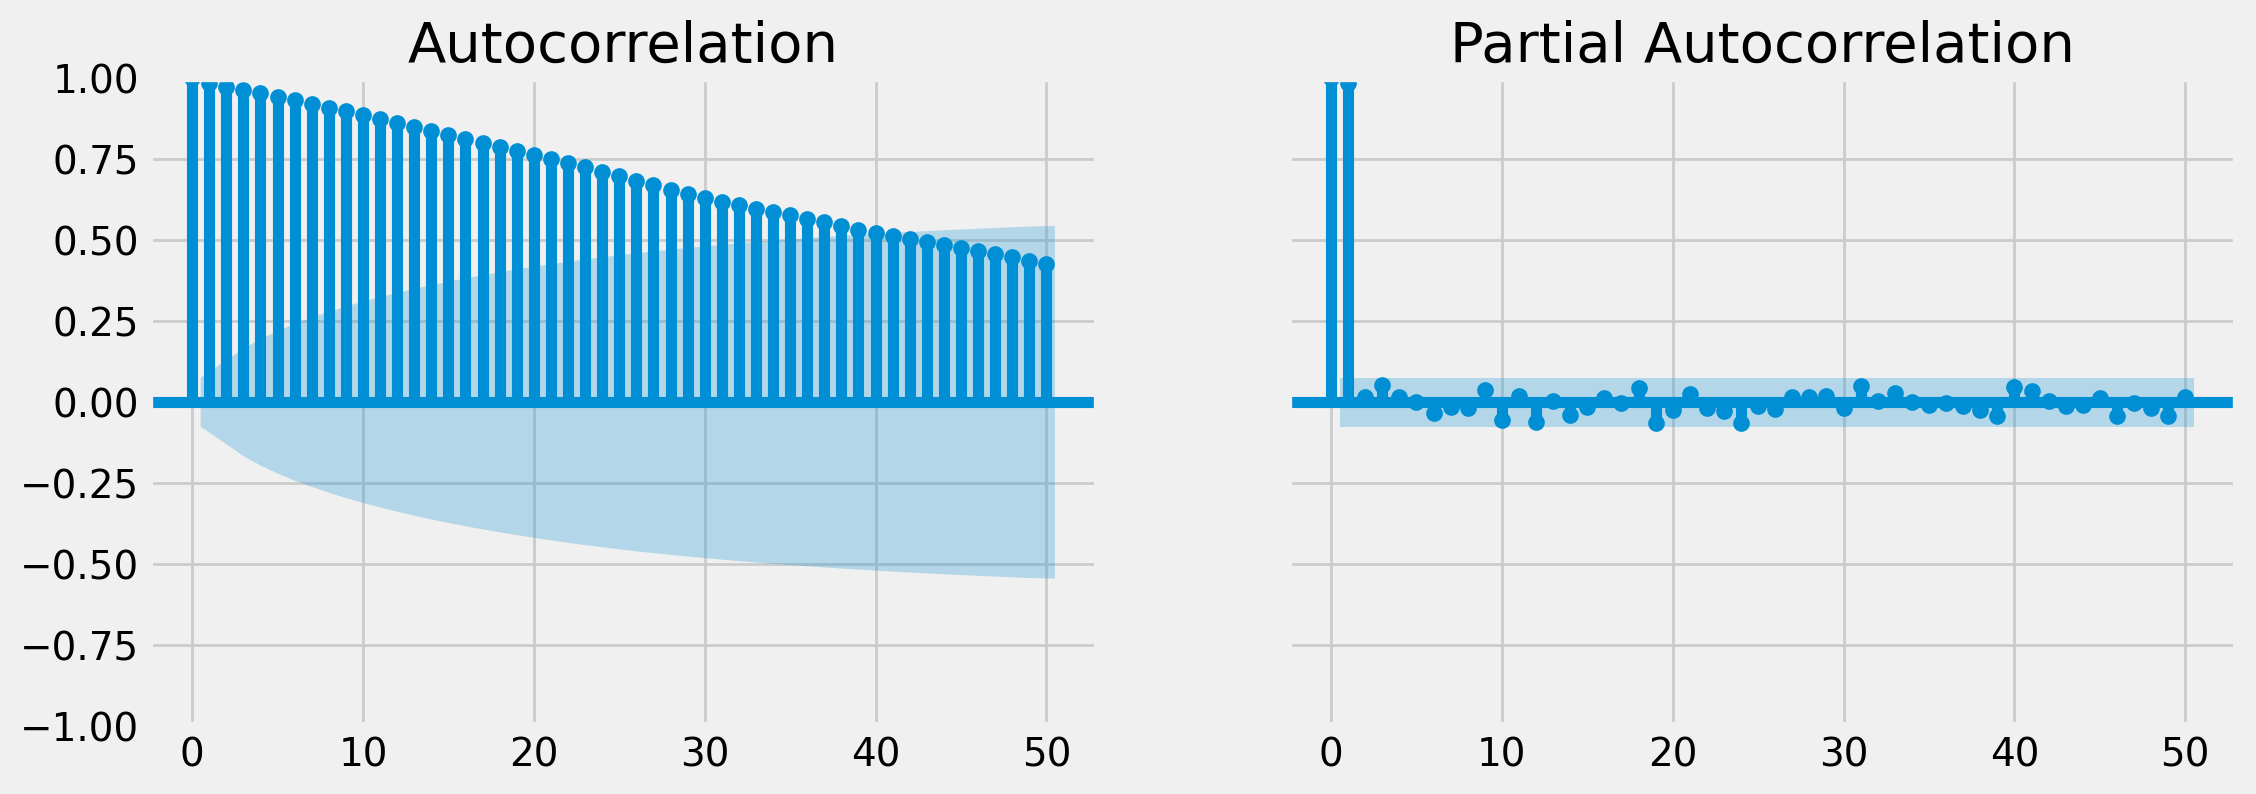

In [11]:
# Show the autocorrelation plots (using the function above)
# How is the data autocorrelated?
autocorr_plots(df.Close, lags=50)

## Resample Weekly

Perform the seasonal decompose on the resampled weekly mean, `df.Close.resample('W').mean()` and adjust the period if there are observed cycles in the residuals

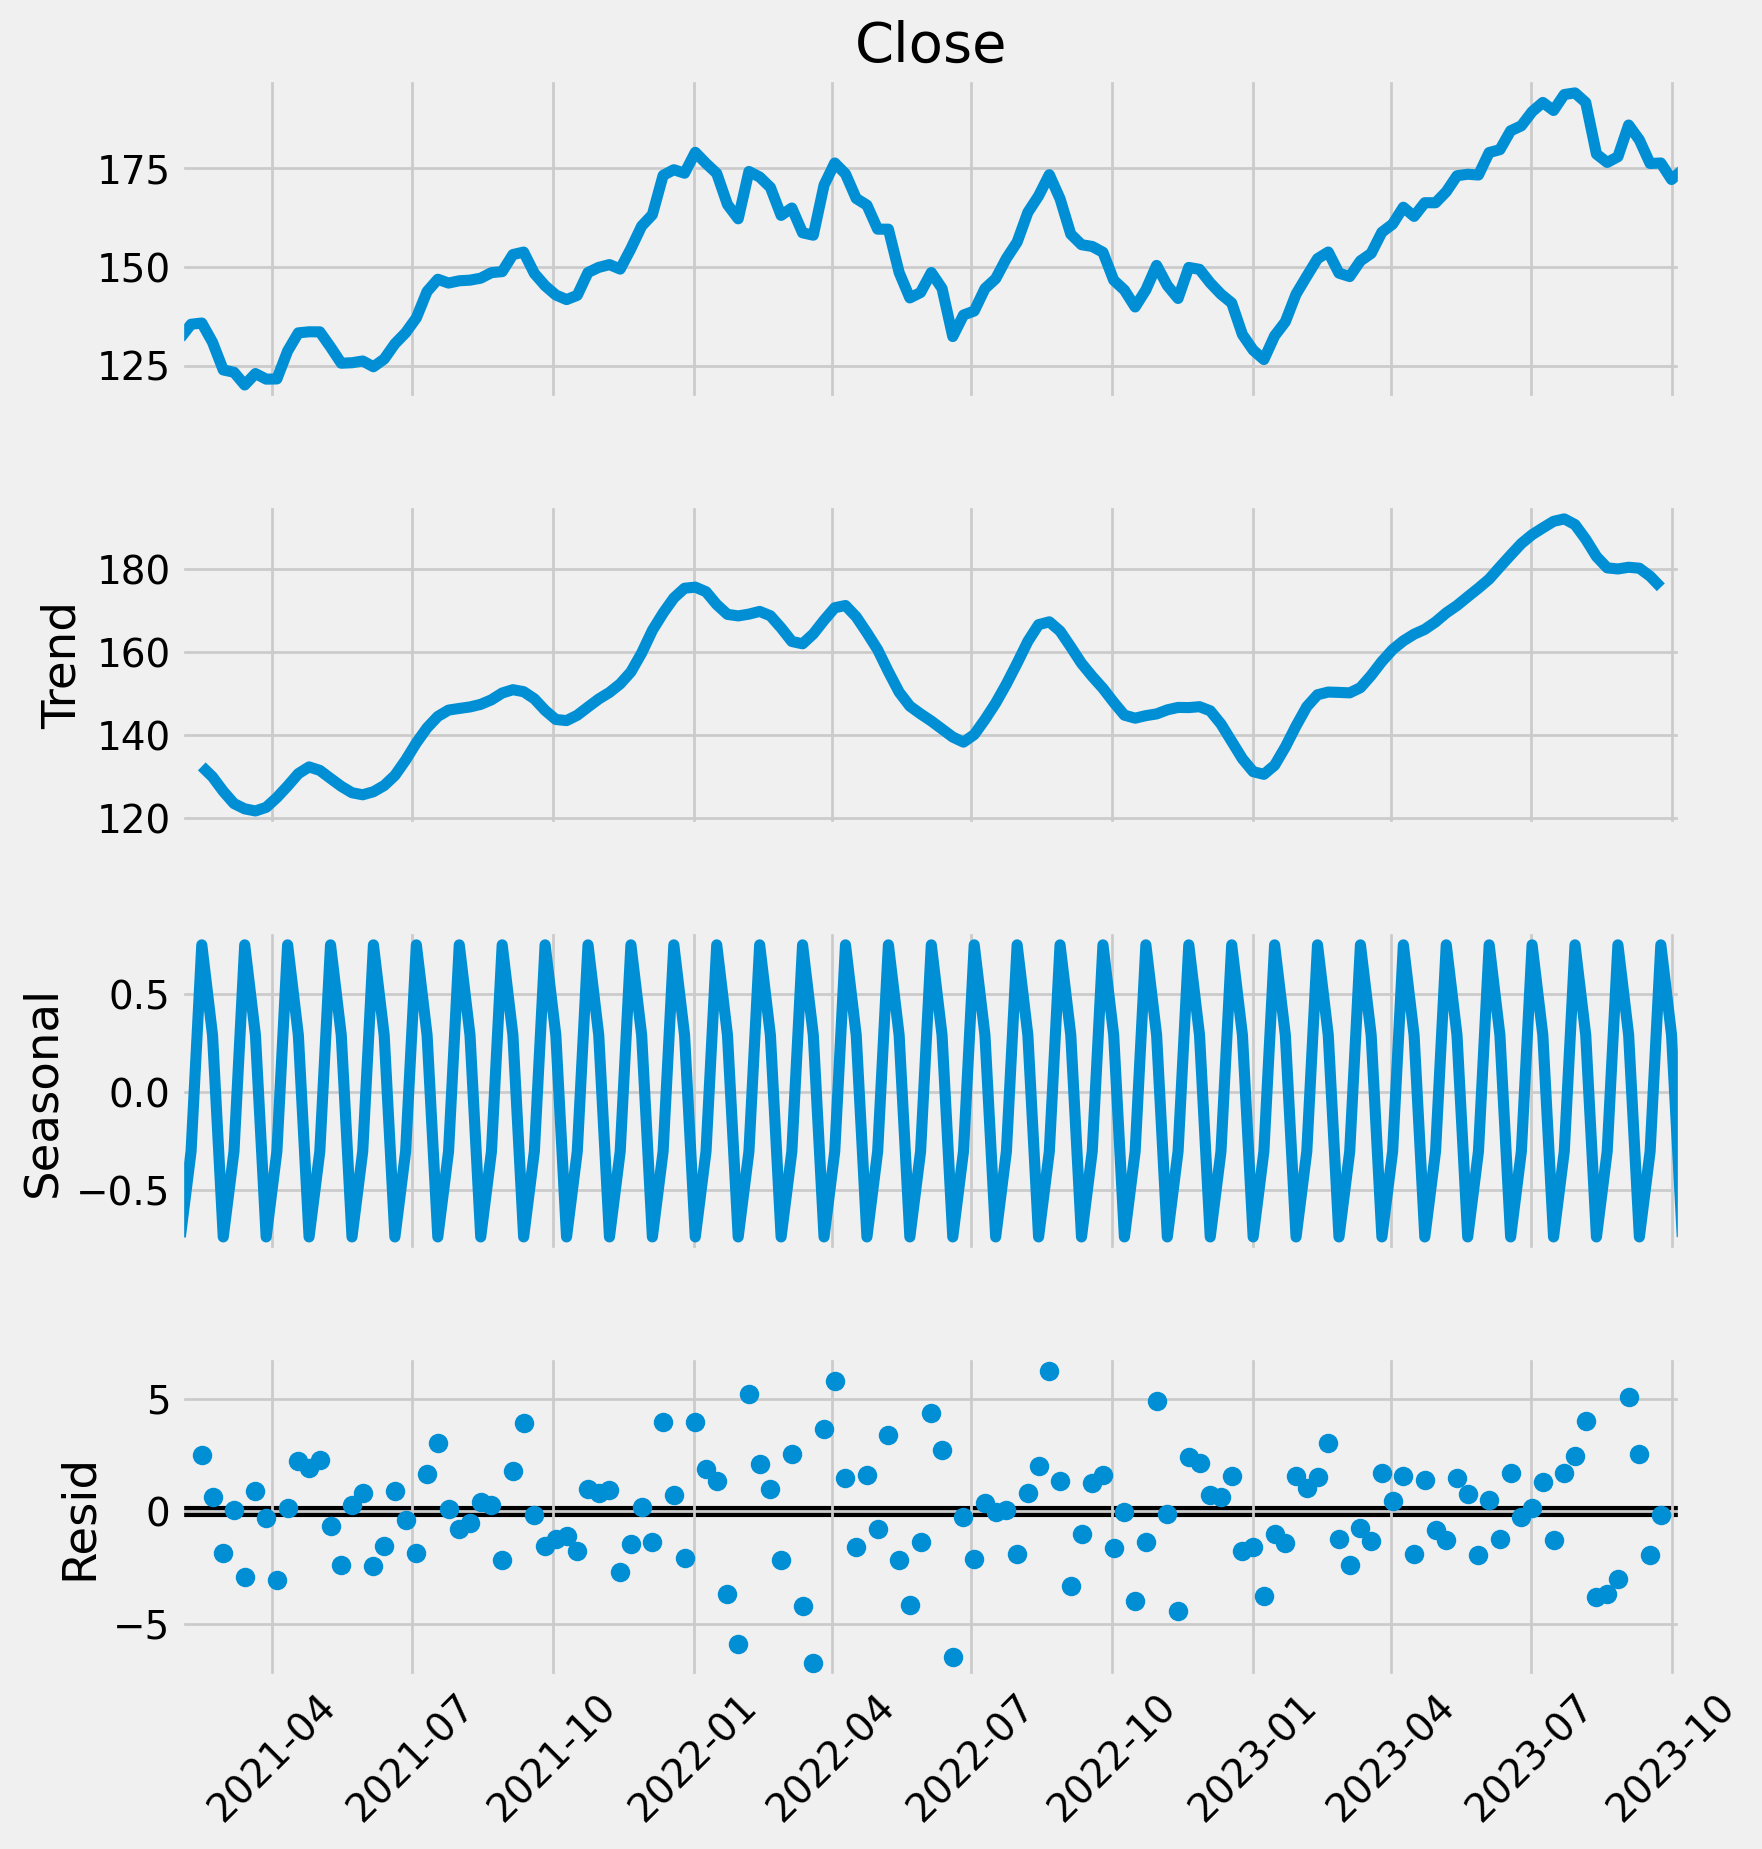

In [19]:
# Perform seasonal decompose on the resampled weekly mean
fig = seasonal_decompose(df.Close.resample('W').mean(), period=4).plot()
fig.set_size_inches(10,10)
plt.xticks(rotation=45)
plt.show()


Check the autocorrelation plots on the resampled weekly means

(<Figure size 1200x400 with 2 Axes>,
 array([<Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

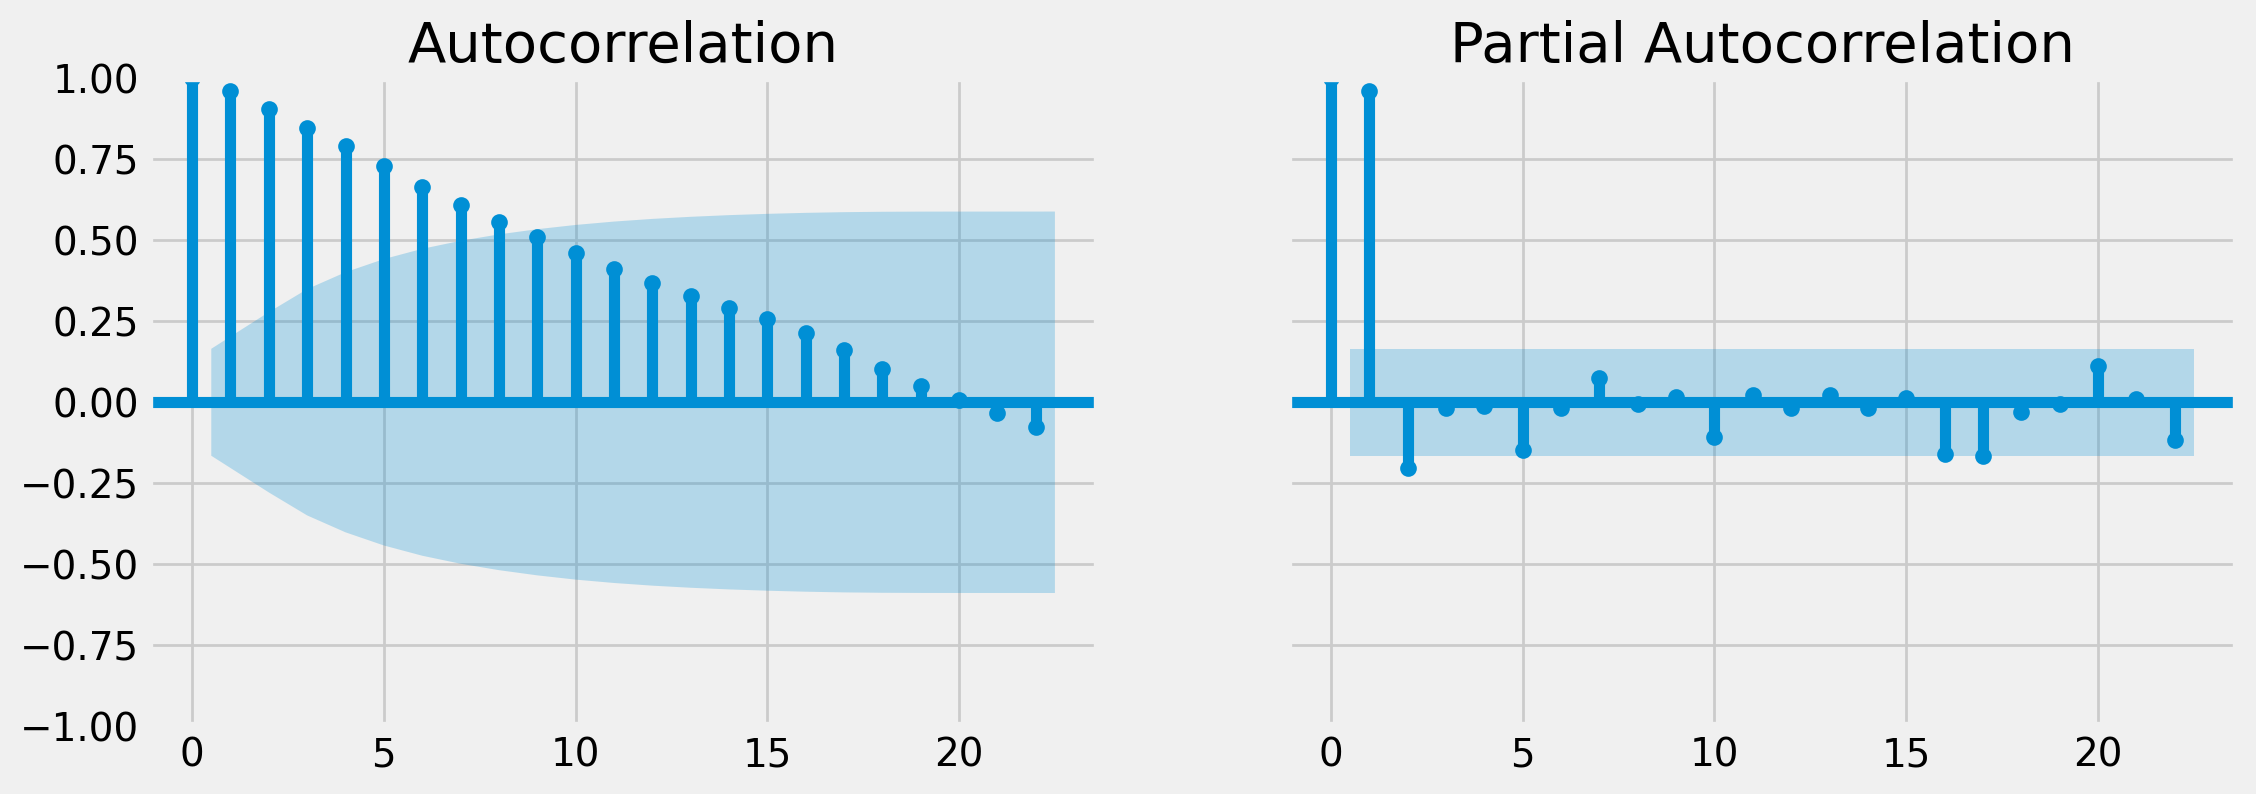

In [20]:
# Autocorrelation
autocorr_plots(df.Close.resample('W').mean())

## Use the differenced series

Try to decompose the differenced series, `df.Close.diff()[1:]` Is it stationary?

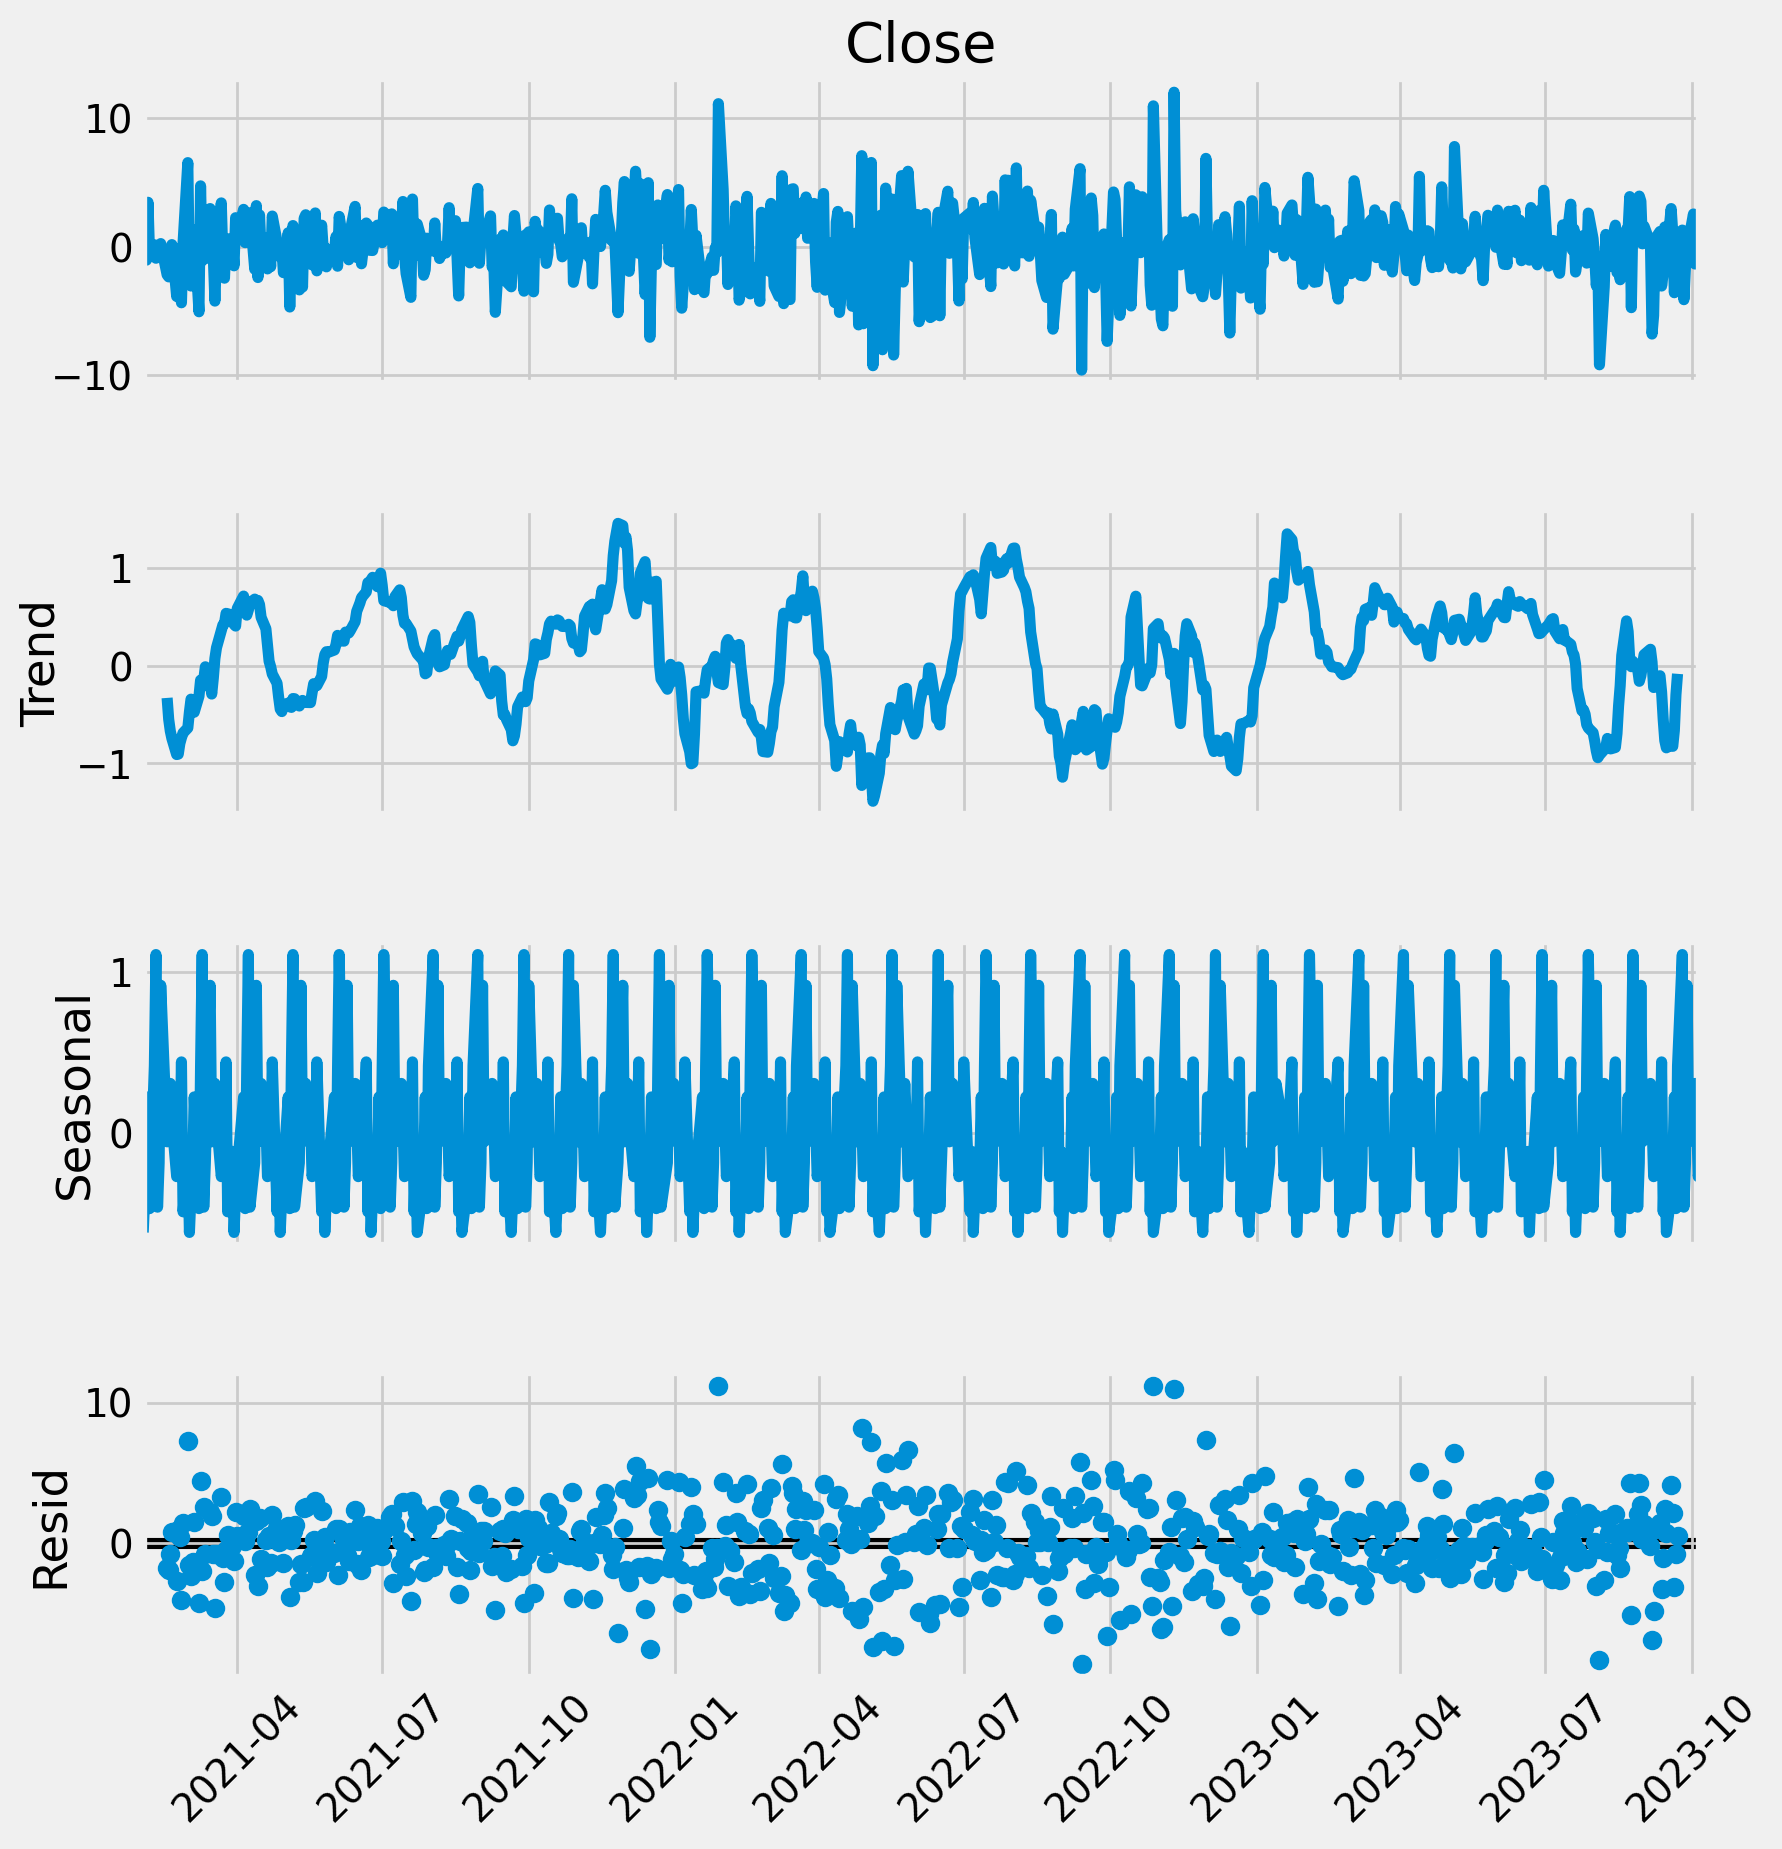

In [23]:
fig = seasonal_decompose(df.Close.diff()[1:], period=20).plot()
fig.set_size_inches(10,10)
plt.xticks(rotation=45)
plt.show()

Check the autocorrelation plots on the differenced series for autocorrelations.

(<Figure size 1200x400 with 2 Axes>,
 array([<Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

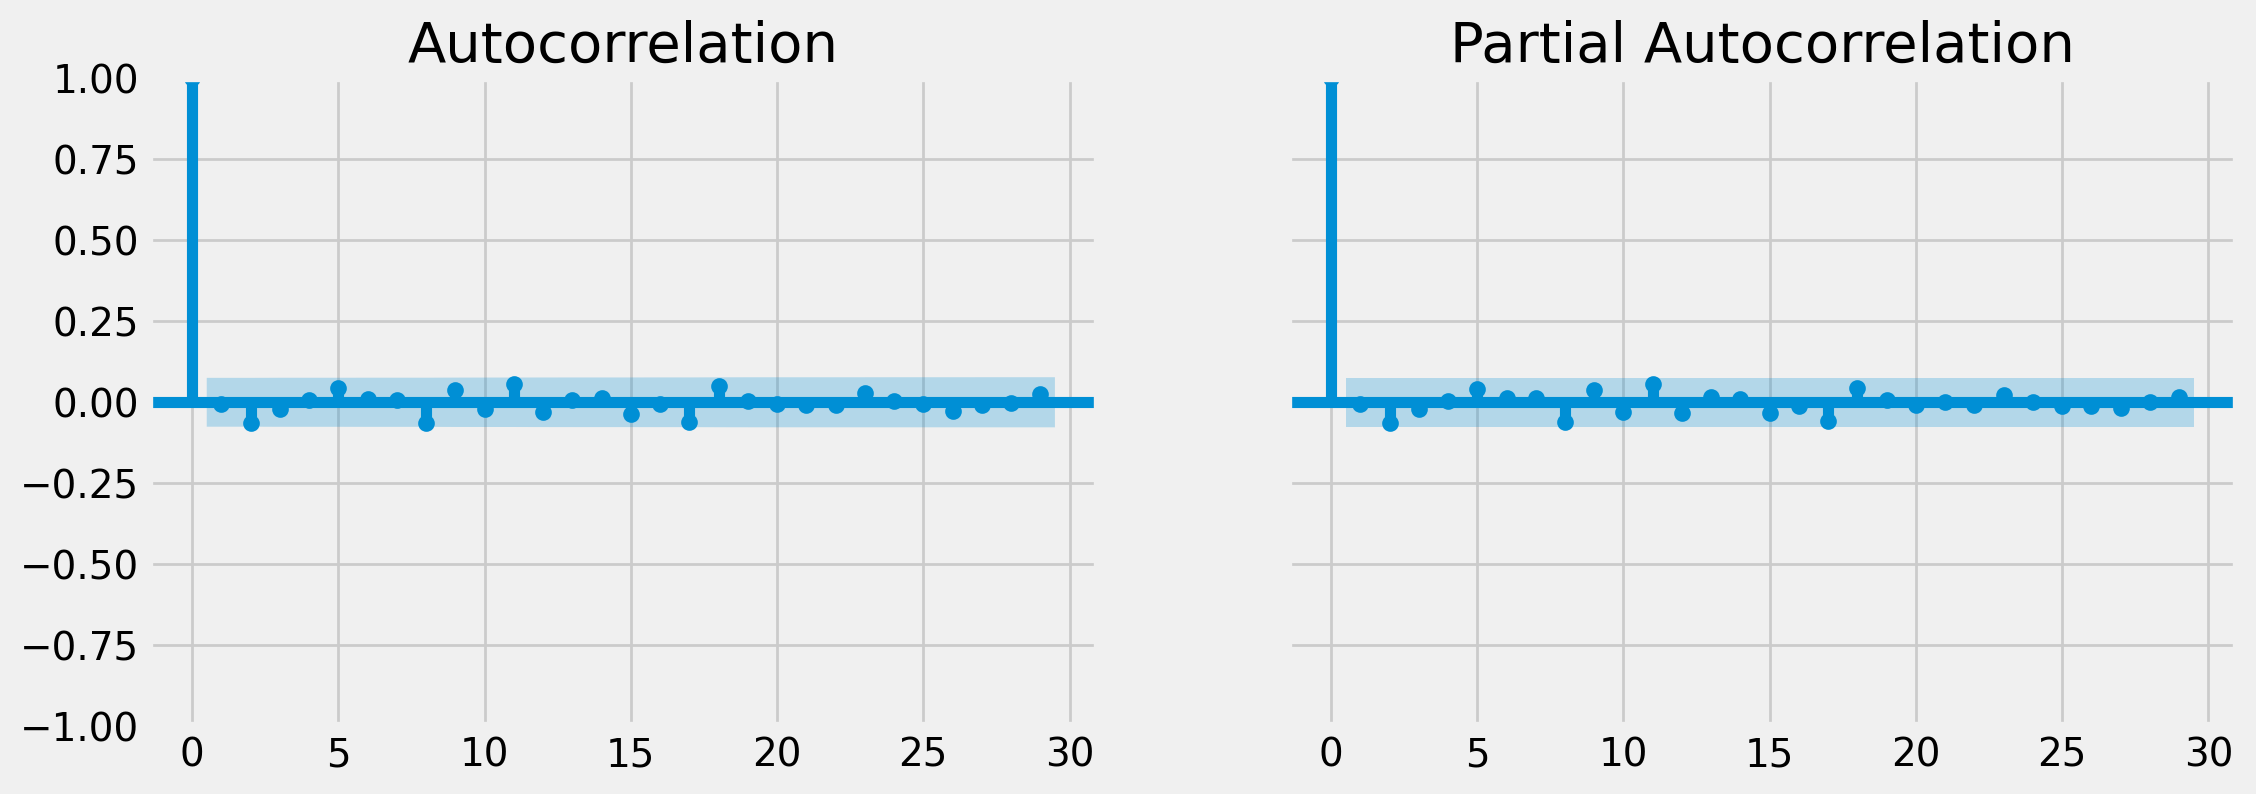

In [24]:
autocorr_plots(df.Close.diff()[1:])